In [123]:
import string
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [124]:
"""
removing unwanted columns from the dataset

"""
text = pd.read_excel('Ticket Samples for Analysis.xlsx')
dropList = [col for col in text.columns if col not in ['Subject', 'Mail']]
text = text.drop(columns = dropList)
text.head()

,Subject,Mail
0,RPP/Covid Sample - No Order for Adams Mary Exe...,"Good afternoon, \nWe received a RPP/Covid samp..."
1,Sanford guide,"Hello,\nI noticed that the Sanford guide did n..."
2,Default Test Request - Connecticut Foot Care C...,Hi Support. Please see attached default test ...
3,case,Has been finalized but needs to be removed as ...
4,new feature,"Hey guys,\nWould it be possible to make the dr..."


In [125]:
stop_words = [ 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
              'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
              "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
              'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
              's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
              'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
              'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
              'wouldn', "wouldn't", 'morning', 'good', 'greetings', 'regards', 'thanks', 'afternoon', 'thank', 'you', 'hello',
              'hi', 'support', 'hey', 'vital', 'evening', 'please' , 'today', 'see', 'default' , 'following']

In [130]:
"""
Pre-processing the text in following steps:
1. Conversion into lower case
2. Removing the punctuations
3. Removing the stop words after splitting the sentence into words
4. Converting the list of final words into a string

"""
def clean_text(mail):
    complaint = mail.lower()
    clean = complaint.translate(str.maketrans('', '', string.punctuation))
    tokens = clean.split()
    final = []
    for word in tokens:
        if word not in stop_words:
            final.append(word)
    final_complaint = ""
    for j in final:
        final_complaint+=j
        final_complaint+=" "
    return final_complaint

In [134]:
"""
function for performing sentiment analysis on the processed text
"""
def sentiment_scores(sentence):
    obj = SentimentIntensityAnalyzer()
    scores = obj.polarity_scores(sentence)
    print("Post processing:\n",sentence)
    print()
    print("Overall sentiment dictionary is: ", scores)
    print("Complaint was rated as ", scores['neg']*100, "% Negative") 
    print("Complaint was rated as ", scores['neu']*100, "% Neutral") 
    print("Complaint was rated as ", scores['pos']*100, "% Positive") 
    print("Complaint is overall Rated As", end = " ") 
    if scores['compound'] >= 0.05 : 
        print("Positive") 
        str =  "Positive"
  
    elif scores['compound'] <= - 0.05 : 
        print("Negative") 
        str =  "Negative"
  
    else : 
        print("Neutral")
        str =  "Neutral"
    return str

In [137]:
"""
doing sentiment analysis for each row

"""

total_rows = text.shape[0]
lst = []
for i in range(total_rows):
    complaint = text['Mail'][i]
    final_complaint = clean_text(complaint)
    print("Customer Reported Communication",i+1,":\n")
    print("Before processing:\n",complaint)
    print()
    emotion = sentiment_scores(final_complaint)
    lst.append(emotion)
    print('-'*50)
    print()


Customer Reported Communication 1 :

Before processing:
 Good afternoon, 
We received a RPP/Covid sample from Executive Medical for XXXXXX, unfortunately there isn't an order in Vital for her. Can we get one created, please? Let me know if you have any questions. 
Thank you, 

Post processing:
 received rppcovid sample executive medical xxxxxx unfortunately isnt order get one created let know questions 

Overall sentiment dictionary is:  {'neg': 0.138, 'neu': 0.747, 'pos': 0.115, 'compound': -0.1027}
Complaint was rated as  13.8 % Negative
Complaint was rated as  74.7 % Neutral
Complaint was rated as  11.5 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 2 :

Before processing:
 Hello,
I noticed that the Sanford guide did not attach to the 4 UTI results for today. Please make fixing this issue a top priority as our groups heavily rely on this information to help guide treatment.
Yesterday’s UTI results

Post processing:
 therewe patient report distribution failture causing results shown va accession number xxxxxx result finalized autoverification yesterday may 4th results report click “view report” give error message 

Overall sentiment dictionary is:  {'neg': 0.096, 'neu': 0.857, 'pos': 0.046, 'compound': -0.34}
Complaint was rated as  9.6 % Negative
Complaint was rated as  85.7 % Neutral
Complaint was rated as  4.6 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Reported Communication 20 :

Before processing:
 Please take these reports out of AG Rhodes ATL and delete the patient. This was the correct doctor but the wrong facility. 

Thanks, 

Post processing:
 take reports ag rhodes atl delete patient correct doctor wrong facility 

Overall sentiment dictionary is:  {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767}
Complaint was rated as  23.7 % Negative
Complaint was rated as  76.3 % Neutral
Complaint was ra

 create account tara dufala mirrors access rights within vitalaxis lab administrator lab technician nju 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
Complaint was rated as  0.0 % Negative
Complaint was rated as  86.1 % Neutral
Complaint was rated as  13.900000000000002 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 40 :

Before processing:
 Hello,
An order for Buckingham Houston didnt cross over from VO to Sparrow's DX
Req attached below

Post processing:
 order buckingham houston didnt cross vo sparrows dx req attached 

Overall sentiment dictionary is:  {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.6124}
Complaint was rated as  30.8 % Negative
Complaint was rated as  69.19999999999999 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Negative
--------------------------------------------------

Customer Report

Post processing:
 make va move case assignment queue tejas pathology set “use va report” check box checked tc 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Complaint was rated as  0.0 % Negative
Complaint was rated as  100.0 % Neutral
Complaint was rated as  0.0 % Positive
Complaint is overall Rated As Neutral
--------------------------------------------------

Customer Reported Communication 59 :

Before processing:
 Hi,
Bucks County GI would like to change the printer where their results are printing. Currently they are printing to a printer in the office at Freedom Pathology. We would now like them to print to a printer on site at Bucks County GI. Can someone reach out to Marianne Kirk on Thursday between 9-12 to set this up?


Post processing:
 bucks county gi would like change printer results printing currently printing printer office freedom pathology would like print printer site bucks county gi someone reach marianne kirk thursday 912

Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 76 :

Before processing:
 Hi All,
See below request from Genevieve over at AUUA. Their Admin user Meg Reed has been unable to unlock Genevieve’s Portal log in. Can someone please reset her password and send to me ASAP? Thank you!
Stay Safe and Healthy,

Post processing:
 request genevieve auua admin user meg reed unable unlock genevieve’s portal log someone reset password send asap stay safe healthy 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}
Complaint was rated as  0.0 % Negative
Complaint was rated as  76.3 % Neutral
Complaint was rated as  23.7 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 77 :

Before processing:
 Vital,
      xxxxx was finally claimed and corrected to accession xxxxx
Wll you please delete xxxxx?

Post pro

Post processing:
 need check number positives bd panel covid19 report supposed generate data positive cases none covid cases showing 

Overall sentiment dictionary is:  {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.8074}
Complaint was rated as  0.0 % Negative
Complaint was rated as  62.8 % Neutral
Complaint was rated as  37.2 % Positive
Complaint is overall Rated As Positive
--------------------------------------------------

Customer Reported Communication 93 :

Before processing:
 Hello,Were noticing some random fails from VO to DX in various accounts.
In most instances, I'm ordering multiple patients and most will cross over and one or so will fail.
It's creating a lag in our processing because the lab has to tell me they don't see the order, I have to investigate and then send them the Req I made.
I have 2 examples, but if we could find a solution so orders don't randomly fail (easier said than done I know) the entire team would greatly appreciate it

Post processing:
 hel

Counter({'Neutral': 40, 'Positive': 35, 'Negative': 24})


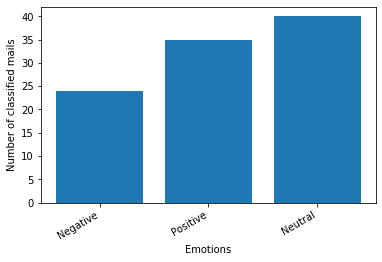

In [138]:
"""
counting the number of mails in each category: positive, negative and neutral
and then plotting the graph
"""
n = Counter(lst)
print(n)

fig, ax1 = plt.subplots()
ax1.bar(n.keys(), n.values())
plt.xlabel("Emotions")
plt.ylabel("Number of classified mails")
fig.autofmt_xdate()
plt.show()